In [14]:
import numpy as np
import csv

from astropy.timeseries import BoxLeastSquares
from scipy.signal import savgol_filter
from astroquery.mast import Observations
import scipy.fftpack
from scipy import signal
from scipy.signal import savgol_filter
from scipy.stats import binned_statistic
import pandas as pd
from astroquery.mast import Catalogs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle
from scipy.signal import savgol_filter
from astropy.coordinates import SkyCoord
from astroquery.mast import Tesscut
from astropy.io import fits
from astropy.wcs import WCS
from statistics import mode
from astropy.coordinates import SkyCoord
from astropy import coordinates as coord, units as u
import os
import glob
from astropy.modeling import models, fitting
from scipy.optimize import minimize, rosen, rosen_der
from astropy.modeling.models import custom_model
from scipy.optimize import curve_fit

import importlib

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams.update({'font.size': 20})

np.set_printoptions(precision=4)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [15]:
path_ = '/Users/vkostov/Documents/GitHub/pandora-scheduler/src/pandorascheduler/'

In [22]:
target_list_name ='Pandora_Target_List_Top20_14May2024'
target_list =  target_list_name + '.csv'
target_list = pd.read_csv(path_ + target_list, sep=",")

# names=target_list['Star Name']

In [23]:
target_list

,Planet Name,Planet Simbad Name,Star Name,Star Simbad Name,Number of Transits to Capture,Transit Duration (hrs),Period (days),Period Uncertainty (days),Transit Epoch (BJD_TDB-2400000.5),Transit Epoch Uncertainty,RA,DEC,Flag
0,WASP-69 b,WASP-69 b,WASP-69,WASP-69,10,2.1610,3.868140,0.000002,59798.28,0.000132,315.025966,-5.094857,1
1,WASP-107 b,WASP-107 b,WASP-107,WASP-107,10,2.7386,5.721474,0.000001,57583.83,0.000011,188.386428,-10.146214,1
2,HIP 65 A b,HIP 65 A b,HIP 65 A,HIP 65 A,10,0.7858,0.980973,0.000003,58325.60,0.000110,0.185606,-54.830823,1
3,TOI-3884 b,TOI-3884 b,TOI-3884,TOI-3884,10,1.6460,4.544570,0.000009,59642.36,0.000120,181.571834,12.507026,1
4,GJ 1214 b,GJ 1214 b,GJ 1214,GJ 1214,10,0.8688,1.580404,0.000000,55700.91,0.000066,258.831399,4.960680,1
5,WASP-177 b,WASP-177 b,WASP-177,WASP-177,10,1.6128,3.071722,0.000001,57993.87,0.000280,334.796989,-1.834430,1
6,WASP-80 b,WASP-80 b,WASP-80,WASP-80,10,2.1310,3.067852,0.000001,56486.93,0.000023,303.166800,-2.144437,1
7,WASP-52 b,WASP-52 b,WASP-52,WASP-52,10,1.8096,1.749780,0.000001,55793.18,0.000090,348.494793,8.761079,1
8,TOI-942 b,TOI-942 b,TOI-942,TOI-942,10,3.4032,4.324210,0.000019,58441.08,0.002100,76.649617,-20.245613,1
9,K2-198 b,K2-198 b,K2-198,K2-198,10,2.9592,17.042868,0.000007,57204.07,0.000140,198.843682,-6.464989,1


In [34]:
{star_name}


{'WASP-69'}

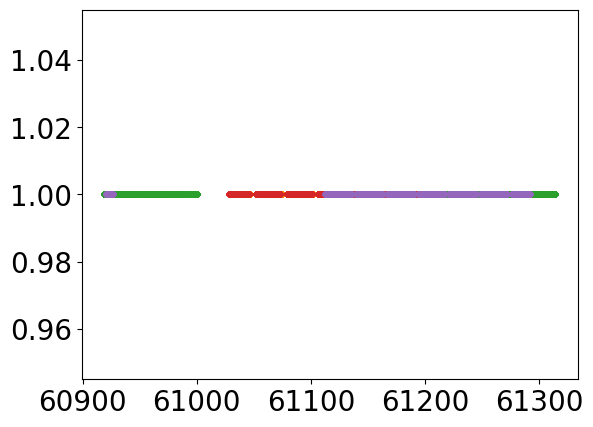

In [36]:
ii = 0

for ii in range(5):
    star_name = target_list["Star Name"][ii]
    vis = pd.read_csv(path_ + f'/targets/{star_name}/Visibility for {star_name}.csv')

    plt.plot(vis['Time(MJD_UTC)'][vis['Visible'] == 1.], vis['Visible'][vis['Visible'] == 1.], '.')

In [32]:
vis

,Time(MJD_UTC),SAA_Crossing,Visible,Earth_Sep,Moon_Sep,Sun_Sep
0,60919.000000,0.0,1.0,112.838133,61.621619,154.883936
1,60919.000694,0.0,1.0,113.874264,61.600214,154.883428
2,60919.001389,0.0,1.0,114.802536,61.577862,154.882910
3,60919.002083,0.0,1.0,115.616564,61.554629,154.882381
4,60919.002778,0.0,1.0,116.310502,61.530588,154.881841
...,...,...,...,...,...,...
568796,61313.997222,0.0,1.0,97.563170,105.993919,127.600370
568797,61313.997917,0.0,1.0,94.104631,105.948750,127.599543
568798,61313.998611,0.0,1.0,90.643142,105.903919,127.598714
568799,61313.999306,0.0,1.0,87.181549,105.859665,127.597883


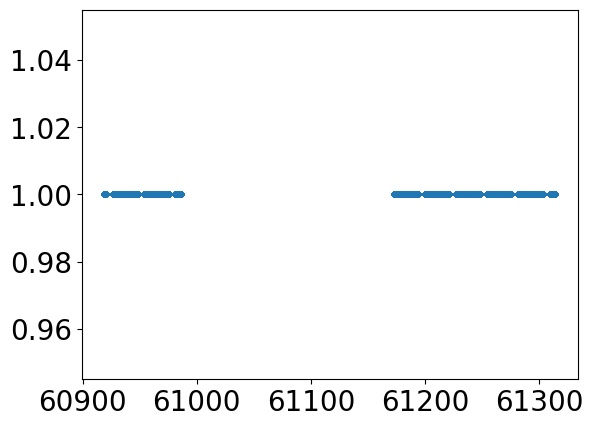

In [35]:
plt.plot(vis['Time(MJD_UTC)'][vis['Visible'] == 1.], vis['Visible'][vis['Visible'] == 1.], '.')

In [18]:
i = 0
path_ = '/Users/vkostov/Documents/GitHub/pandora-scheduler/src/pandorascheduler/data/'
planet_name = target_list["Planet Name"][i]
star_name = target_list["Star Name"][i]
planet_data = pd.read_csv(path_ + f'/targets/{star_name}/{planet_name}/Visibility for {planet_name}.csv')

In [19]:
planet_data

,Transits,Transit_Start,Transit_Stop,Transit_Coverage,SAA_Overlap
0,0.0,60919.989883,60920.079924,0.854962,0.000000
1,1.0,60923.858023,60923.948064,0.000000,0.145038
2,2.0,60927.726163,60927.816204,0.679389,0.076336
3,3.0,60931.594303,60931.684344,0.816794,0.061069
4,4.0,60935.462443,60935.552484,0.618321,0.083969
...,...,...,...,...,...
97,97.0,61295.199463,61295.289504,0.792308,0.076923
98,98.0,61299.067603,61299.157644,0.580153,0.000000
99,99.0,61302.935743,61303.025784,0.427481,0.145038
100,100.0,61306.803883,61306.893924,0.000000,0.076336


In [5]:
fig = plt.figure(figsize=(20,11))
plt.rcParams.update({'font.size': 26})  

<Figure size 2000x1100 with 0 Axes>